> # NAMA  : RANDY DWIMAH SAPUTRA
# NIM      : 09011381722123
# KELAS : SK5

# PENENTUAN SISTEM BONUS DRIVER OH-JEK MENGGUNAKAN LOGIC FUZZY

Perusahaan Oh-Jek merupakan perusahaan yang bergerak dibidang jasa, sistem bonus dari perusahaan ini ditentukan oleh jumlah orderan dan nilai performa yang diberikan oleh pelanggan. Dimana orderan terkecil yaitu 1 orderan/hari sampai dengan 21 orderan/hari untuk orderan terbesarnya. Sedangkan nilai performa terkecil yaitu 0 sampai dengan 5 untuk nilai performa terbesarnya. Bonus yang berikan mulai dari 10000 per hari (bonus terendah) sampai dengan 200000 per hari (bonus tertinggi). Apabila perusahaan menggunakan 9 aturan fuzzy sebagai berikut:

- [R1] If orderan is _sedikit_ and performa is _buruk_ then bonus is _sedikit_
- [R2] If orderan is _cukup_ and performa is _buruk_ then bonus is _sedikit_
- [R3] If orderan is _banyak_ and performa is _buruk_ then bonus is _cukup_
- [R4] If orderan is _sedikit_ and performa is _cukup_ then bonus is _sedikit_
- [R5] If orderan is _cukup_ and performa is _cukup_ then bonus is _cukup_
- [R6] If orderan is _banyak_ and performa is _cukup_ then bonus is _banyak_
- [R7] If orderan is _sedikit_ and performa is _baik_ then bonus is _sedikit_
- [R8] If orderan is _cukup_ and performa is _baik_ then bonus is _cukup_
- [R9] If orderan is _banyak_ and performa is _baik_ then bonus is _banyak_

Berapakah bonus yang diberikan pada driver yang dapat menyelesaikan 15 orderan dengan performa 4.5 per hari? 

# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy
2. Aplikasi Fungsi Implikasi
3. Komposisi Aturan
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

1. Range orderan [1, 21]
2. Range Performa [1, 5]
3. Range Bonus [10000, 210000]

## A. PEMBENTUKAN HIMPUNAN FUZZY

### 1. Variabel Input
Variabel input atau faktor yang menentukan besarnya bonus :
- Orderan

In [34]:
x_orderan  = np.arange(1, 22, 1)

- Performa

In [35]:
x_performa = np.arange(1, 5.1, 1)

### 2. Variabel Ouput
Variabel output ini adalah jumlah bonus :
- Bonus

In [36]:
x_bonus    = np.arange(10000, 210001, 1)

### 3. Nilai Linguistik

a. Nilai Linguistik pada Variabel Orderan ada 3, yaitu:
- Orderan Sedikit
$$ Orderan Sedikit [x] = 
\begin{cases}
    \frac{(11-x)}{(11-1)} & ; 1 \leq  x \leq\ 11 \\
    0 & ; x \geq 11
\end{cases}
$$

- Orderan Cukup
$$ Orderan Cukup [x] = 
\begin{cases}
    0 & ; x \leq 1\\
    \frac{(x-1)}{(11-1)} & ;1 \leq x \leq\ 11 \\
    \frac{(21-x)}{(21-11)} & ; 11 \leq  x \leq\ 21 \\
    0 & ; x \geq 21
\end{cases}
$$

- Orderan Banyak
$$ Orderan Banyak [x] = 
\begin{cases}
    0 & ; x \leq 11\\
    \frac{(x-11)}{(21-11)} & ;11 \leq x \leq\ 21 \\
\end{cases}
$$

b. Nilai Linguistik pada Variabel Performa ada 3, yaitu:
- Performa Buruk
$$ Performa Buruk [x] = 
\begin{cases}
    \frac{(3-x)}{(3-1)} & ; 1 \leq  x \leq\ 3 \\
    0 & ; x \geq 3
\end{cases}
$$

- Performa Cukup
$$ Performa Cukup [x] = 
\begin{cases}
    0 & ; x \leq 3\\
    \frac{(x-1)}{(3-1)} & ; 1 \leq x \leq\ 3 \\
    \frac{(5-x)}{(5-3)} & ; 3 \leq  x \leq\ 5 \\
    0 & ; x \geq 3
\end{cases}
$$

- Performa Baik
$$ Performa Baik [x] = 
\begin{cases}
    0 & ; x \leq 5\\
    \frac{(x-3)}{(5-3)} & ; 3 \leq x \leq\ 5 \\
\end{cases}
$$

c. Nilai Linguistik pada Variabel Bonus ada 3, yaitu:
- Bonus Sedikit
$$ Bonus Sedikit [z] = 
\begin{cases}
    \frac{(110000-z)}{(110000-10000)} & ; 10000 \leq  z \leq\ 110000 \\
    0 & ; z \geq 110000
\end{cases}
$$

- Bonus Cukup
$$ Bonus Cukup [z] = 
\begin{cases}
    0 & ; z \leq 10000\\
    \frac{(z-10000)}{(110000-10000)} & ;10000 \leq z \leq\ 110000 \\
    \frac{(210000-z)}{(210000-110000)} & ; 110000 \leq  z \leq\ 210000 \\
    0 & ; z \geq 210000
\end{cases}
$$

- Bonus Banyak
$$ Bonus Banyak [z] = 
\begin{cases}
    0 & ; z \leq 110000\\
    \frac{(z-110000)}{(210000-110000)} & ;110000 \leq z \leq\ 210000 \\
\end{cases}
$$

### 4. Membership Function 
- Membership function yang digunakan yaitu fungsi segitiga atau triangular (trimf).

#### Membership Function dari orderan (Variabel Input)
- Orderan  : Sedikit, Cukup, Banyak

In [37]:
orderan_sedikit        = fuzz.trimf(x_orderan, [1, 1, 11])
orderan_cukup          = fuzz.trimf(x_orderan, [1, 11, 21])
orderan_banyak         = fuzz.trimf(x_orderan, [11, 21, 21])

- Menampilan Plot Membership Function dari Orderan

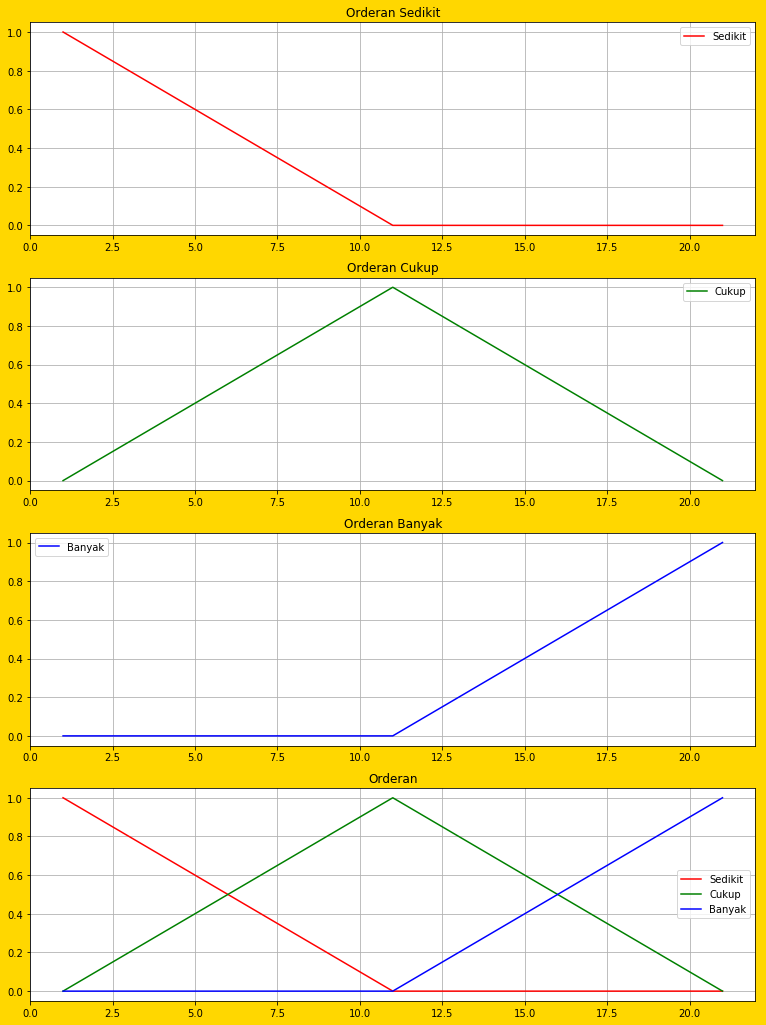

In [38]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows= 4 ,facecolor='gold', figsize=(13, 18))
ax0.plot(x_orderan, orderan_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Orderan Sedikit')
ax0.grid()
ax0.legend()

ax1.plot(x_orderan, orderan_cukup, 'green', linewidth=1.5, label='Cukup')
ax1.set_title('Orderan Cukup')
ax1.grid()
ax1.legend()

ax2.plot(x_orderan, orderan_banyak, 'blue', linewidth=1.5, label='Banyak')
ax2.set_title('Orderan Banyak')
ax2.grid()
ax2.legend()

ax3.plot(x_orderan, orderan_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax3.plot(x_orderan, orderan_cukup, 'green', linewidth=1.5, label='Cukup')
ax3.plot(x_orderan, orderan_banyak, 'blue', linewidth=1.5, label='Banyak')
ax3.set_title('Orderan')
ax3.grid()
ax3.legend()

#### Membership Function dari Performa (Variabel Input)
- Performa : Buruk, Cukup, Baik

In [39]:
performa_buruk        = fuzz.trimf(x_performa, [1, 1, 3])
performa_cukup        = fuzz.trimf(x_performa, [1, 3, 5])
performa_baik         = fuzz.trimf(x_performa, [3, 5, 5])

- Menampilan Plot Membership Function dari Performa

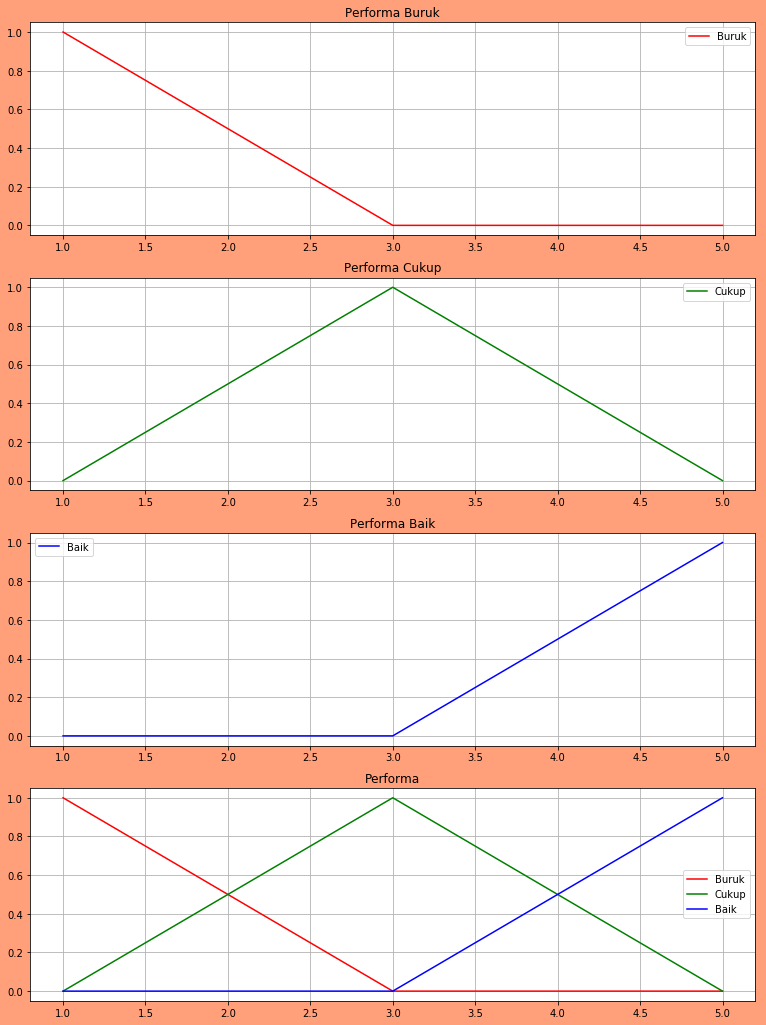

In [40]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows= 4 ,facecolor='lightsalmon', figsize=(13, 18))
ax0.plot(x_performa, performa_buruk, 'red', linewidth=1.5, label='Buruk')
ax0.set_title('Performa Buruk')
ax0.grid()
ax0.legend()

ax1.plot(x_performa, performa_cukup, 'green', linewidth=1.5, label='Cukup')
ax1.set_title('Performa Cukup')
ax1.grid()
ax1.legend()

ax2.plot(x_performa, performa_baik, 'blue', linewidth=1.5, label='Baik')
ax2.set_title('Performa Baik')
ax2.grid()
ax2.legend()

ax3.plot(x_performa, performa_buruk, 'red', linewidth=1.5, label='Buruk')
ax3.plot(x_performa, performa_cukup, 'green', linewidth=1.5, label='Cukup')
ax3.plot(x_performa, performa_baik, 'blue', linewidth=1.5, label='Baik')
ax3.set_title('Performa')
ax3.grid()
ax3.legend()

#### Membership Function dari Bonus (Variabel Output)
- Bonus    : Sedikit, Cukup, Banyak

In [41]:
bonus_sedikit = fuzz.trimf(x_bonus, [10000, 10000, 110000])
bonus_cukup   = fuzz.trimf(x_bonus, [10000, 110000, 210000]) 
bonus_banyak  = fuzz.trimf(x_bonus, [110000, 210000, 210000])

- Menampilan Plot Membership Function dari Bonus

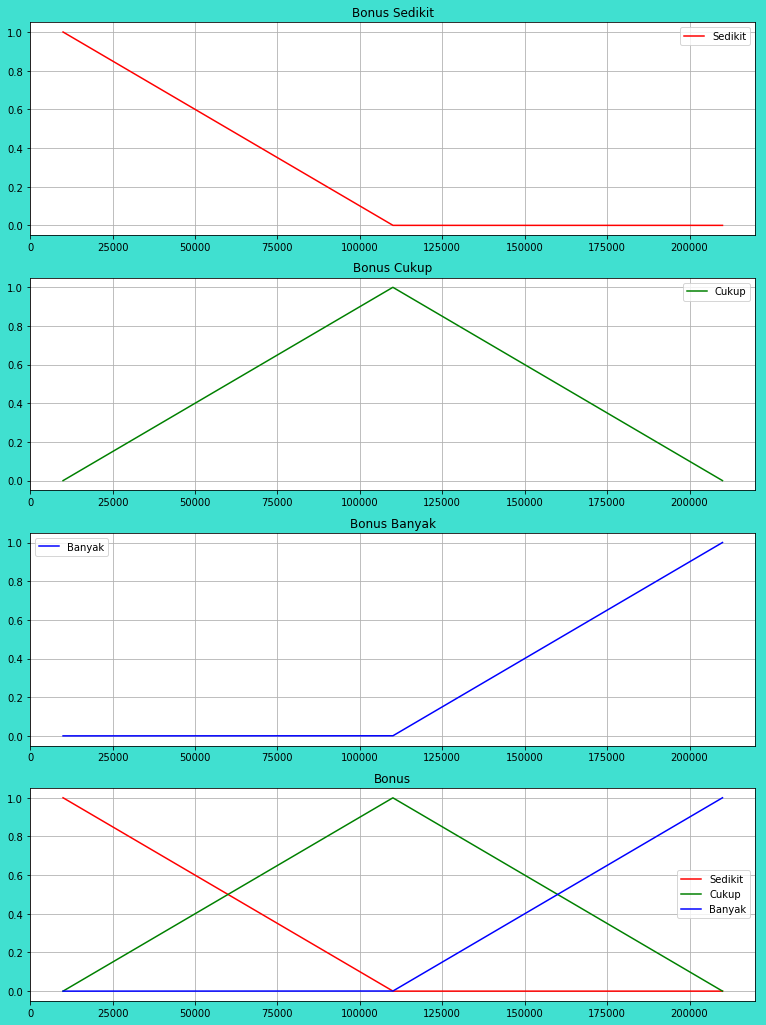

In [48]:
fig, (ax0,ax1,ax2, ax3) = plt.subplots(nrows= 4 ,facecolor='turquoise', figsize=(13, 18))
ax0.plot(x_bonus, bonus_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Bonus Sedikit')
ax0.grid()
ax0.legend()

ax1.plot(x_bonus, bonus_cukup, 'green', linewidth=1.5, label='Cukup')
ax1.set_title('Bonus Cukup')
ax1.grid()
ax1.legend()

ax2.plot(x_bonus, bonus_banyak, 'blue', linewidth=1.5, label='Banyak')
ax2.set_title('Bonus Banyak')
ax2.grid()
ax2.legend()

ax3.plot(x_bonus, bonus_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax3.plot(x_bonus, bonus_cukup, 'green', linewidth=1.5, label='Cukup')
ax3.plot(x_bonus, bonus_banyak, 'blue', linewidth=1.5, label='Banyak')
ax3.set_title('Bonus')
ax3.grid()
ax3.legend()

### 5. Plot Orderan (Sedikit, Cukup dan Banyak), Performa (Buruk, Cukup dan Baik) dan Bonus (Sedikit, Cukup dan Banyak)

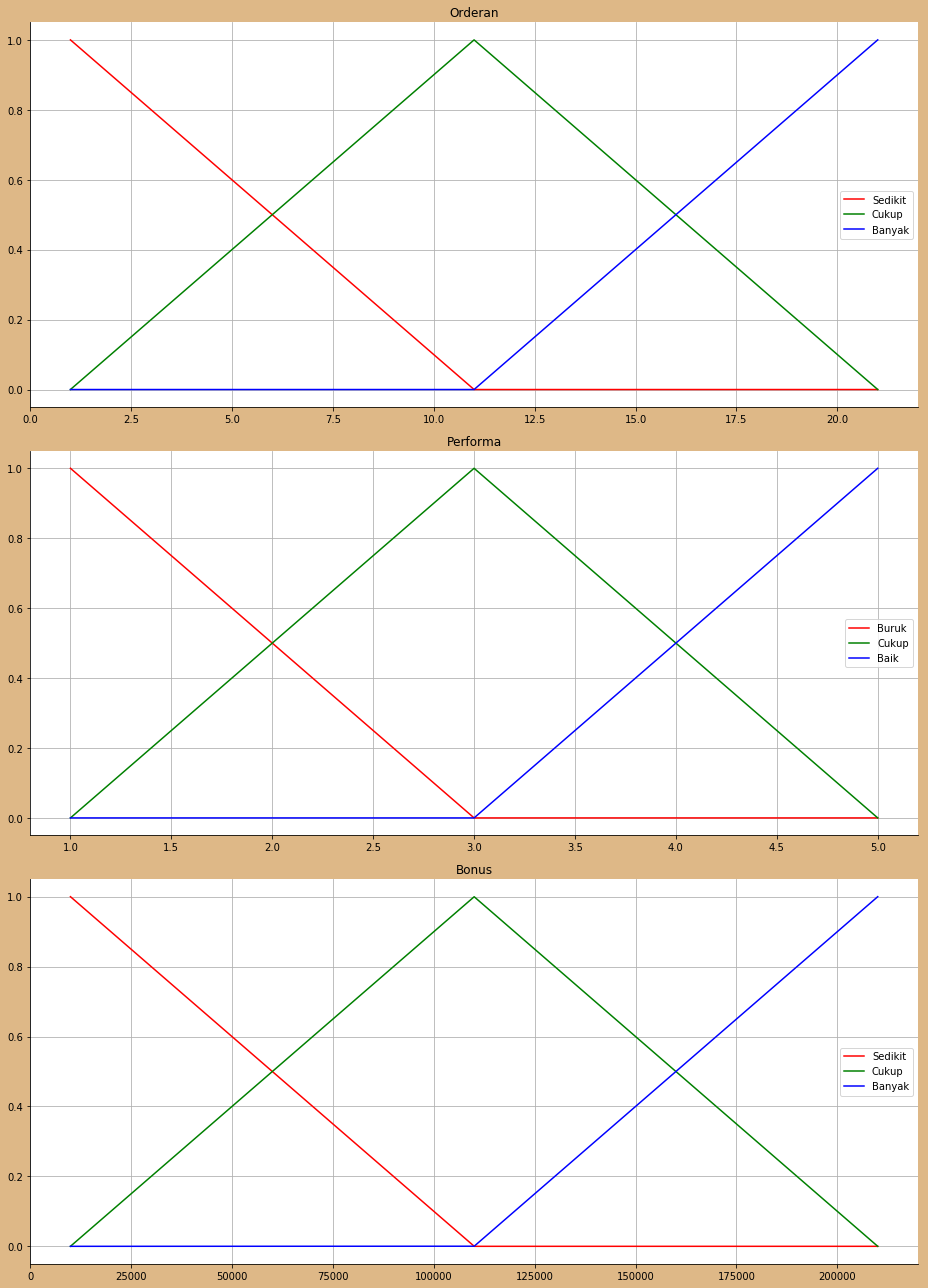

In [49]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows= 3 ,facecolor='burlywood', figsize=(13, 18))
ax0.plot(x_orderan, orderan_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.plot(x_orderan, orderan_cukup, 'green', linewidth=1.5, label='Cukup')
ax0.plot(x_orderan, orderan_banyak, 'blue', linewidth=1.5, label='Banyak')
ax0.set_title('Orderan')
ax0.grid()
ax0.legend()

ax1.plot(x_performa, performa_buruk, 'red', linewidth=1.5, label='Buruk')
ax1.plot(x_performa, performa_cukup, 'green', linewidth=1.5, label='Cukup')
ax1.plot(x_performa, performa_baik, 'blue', linewidth=1.5, label='Baik')
ax1.set_title('Performa')
ax1.grid()
ax1.legend()

ax2.plot(x_bonus, bonus_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax2.plot(x_bonus, bonus_cukup, 'green', linewidth=1.5, label='Cukup')
ax2.plot(x_bonus, bonus_banyak, 'blue', linewidth=1.5, label='Banyak')
ax2.set_title('Bonus')
ax2.grid()
ax2.legend()

# Menghapus axes atas dan kanan
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.autoscale_view
    plt.tight_layout()

## B. APLIKASI FUNGSI IMPLIKASI

- Memasukkan Nilai yang akan Dihitung

In [50]:
Jumlah_orderan = input('masukkan jumlah orderan 1-21 = ')
Nilai_Performa = input('masukkan nilai performa 1-5 = ')

masukkan jumlah orderan 1-21 = 12
masukkan nilai performa 1-5 = 4.5


In [51]:
print('Jumlah Orderan = {},'.format(Jumlah_orderan), 'Nilai Performa = {}'.format(Nilai_Performa))

Jumlah Orderan = 12, Nilai Performa = 4.5


- Menentukan Derajat Keanggotaan atau Derajat Membership dari Orderan

In [52]:
jumlah_orderan_sedikit        = fuzz.interp_membership(x_orderan, orderan_sedikit, float(Jumlah_orderan))
jumlah_orderan_cukup          = fuzz.interp_membership(x_orderan, orderan_cukup, float(Jumlah_orderan))
jumlah_orderan_banyak         = fuzz.interp_membership(x_orderan, orderan_banyak, float(Jumlah_orderan))

- Menentukan Derajat Keanggotaan atau Derajat Membership dari Performa

In [53]:
nilai_performa_buruk          = fuzz.interp_membership(x_performa, performa_buruk, float(Nilai_Performa))
nilai_performa_cukup          = fuzz.interp_membership(x_performa, performa_cukup, float(Nilai_Performa))
nilai_performa_baik           = fuzz.interp_membership(x_performa, performa_baik, float(Nilai_Performa))

- Fuzzy Rules

In [54]:
rule1  = np.fmin(jumlah_orderan_sedikit, nilai_performa_buruk)
bns_sedikit = np.fmin(rule1, bonus_sedikit)

rule2  = np.fmin(jumlah_orderan_cukup, nilai_performa_buruk)
bns_sedikit = np.fmin(rule2, bonus_sedikit)

rule3  = np.fmin(jumlah_orderan_banyak, nilai_performa_buruk)
bns_cukup = np.fmin(rule3, bonus_cukup)

rule4  = np.fmin(jumlah_orderan_sedikit, nilai_performa_cukup)
bns_sedikit = np.fmin(rule4, bonus_sedikit)

rule5  = np.fmin(jumlah_orderan_cukup, nilai_performa_cukup)
bns_cukup = np.fmin(rule5, bonus_cukup)

rule6  = np.fmin(jumlah_orderan_banyak, nilai_performa_cukup)
bns_banyak = np.fmin(rule6, bonus_banyak)

rule7  = np.fmin(jumlah_orderan_sedikit, nilai_performa_baik)
bns_sedikit = np.fmin(rule7, bonus_sedikit)

rule8  = np.fmin(jumlah_orderan_cukup, nilai_performa_baik)
bns_cukup = np.fmin(rule8, bonus_cukup)

rule9  = np.fmin(jumlah_orderan_banyak, nilai_performa_baik)
bns_banyak = np.fmin(rule9, bonus_banyak)

bonus0 = np.zeros_like(x_bonus)

0.25


- Menampilkan Jumlah Bonus yang Didapat dalam Bentuk Grafik (Plot) 

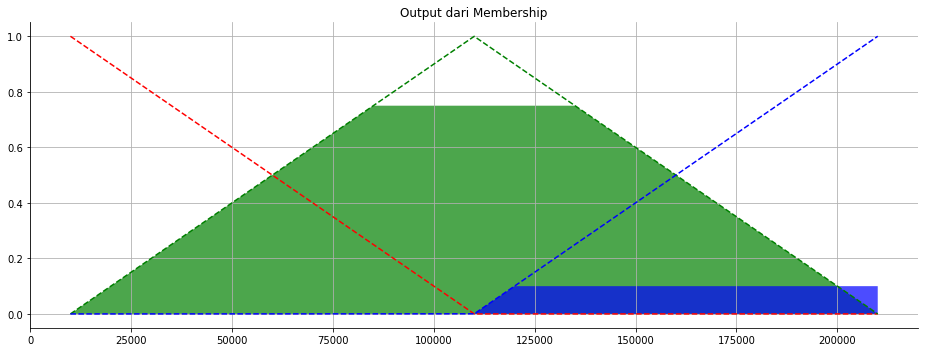

In [60]:
fig, ax0 = plt.subplots(figsize=(13, 5))
ax0.fill_between(x_bonus, bonus0, bns_sedikit, facecolor='red', alpha=0.7)
ax0.plot(x_bonus, bonus_sedikit, 'red', linewidth=1.5, linestyle='--')

ax0.fill_between(x_bonus, bonus0, bns_cukup, facecolor='green', alpha=0.7)
ax0.plot(x_bonus, bonus_cukup, 'green', linewidth=1.5, linestyle='--')

ax0.fill_between(x_bonus, bonus0, bns_banyak, facecolor='blue', alpha=0.7)
ax0.plot(x_bonus, bonus_banyak, 'blue', linewidth=1.5, linestyle='--')

ax0.set_title('Output dari Membership')
ax0.grid()

# Menghapus axes atas dan kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.tight_layout()

## C. KOMPOSISI ATURAN DAN DEFUZZIFIKASI

### Defuzifikasi menggunakan Centroid

- Aggregate dari 3 output membership Function

In [56]:
aggregated = np.fmax(bns_sedikit, np.fmax(bns_cukup, bns_banyak))

### - Menghitung Hasil Defuzifikasi

In [57]:
jumlah_bonus = fuzz.defuzz(x_bonus, aggregated, 'centroid')
bns = fuzz.interp_membership(x_bonus, aggregated, jumlah_bonus)

- Menampilkan Jumlah Bonus yang Didapat dalam Bentuk Grafik (Plot)

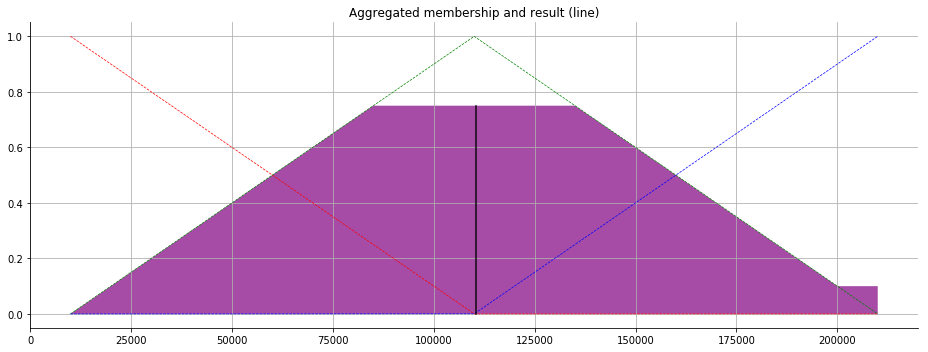

In [61]:
fig, ax0 = plt.subplots(figsize=(13, 5))
ax0.plot(x_bonus, bonus_sedikit, 'red', linewidth=0.7, linestyle='--', )
ax0.plot(x_bonus, bonus_cukup, 'green', linewidth=0.7, linestyle='--')
ax0.plot(x_bonus, bonus_banyak, 'blue', linewidth=0.7, linestyle='--')
ax0.fill_between(x_bonus, bonus0, aggregated, facecolor='Purple', alpha=0.7)
ax0.plot([jumlah_bonus, jumlah_bonus], [0, bns], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
ax0.grid()

#Menghilangkan sumbu atas dan kanan dari grafik
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.tight_layout()

- Menampilkan Jumlah Bonus

In [59]:
print(jumlah_bonus)

110512.8205127567


# B. PENYELESAIAN DENGAN PERHITUNGAN MANUAL

## SOAL

Berapakah bonus yang diberikan pada driver yang dapat menyelesaikan 12 orderan dengan performa 4.5 per hari? 

### 1. Fuzzifikasi

#### Jumlah Orderan : 12

- Orderan Cukup [12] = (21-12)/(21-11) <br>
<font color=red>Orderan Cukup [12] = 0.9</font>


- Orderan Banyak [12] = (12-11)/(21-11) <br> 
<font color=red>Orderan Banyak [12] = 0.1</font>


#### Nilai Performa : 4.5

- Performa Cukup [4.5] = (5-4.5)/(5-3) <br>
<font color=red>Performa Cukup [4.5] = 0.25</font>


- Performa Baik [4.5] = (4.5-2.5)/(5-3) <br>
<font color=red>Performa Baik [4.5] = 0.75</font>

### 2. IMPLIKASI

A. [R5] If orderan is _cukup_ and performa is _cukup_ then bonus is _cukup_

$$
a-predikat5	= OrderanCukup \cap Performa Cukup  
	=	min ( OrderanCukup [12], PerformaCukup[4.5])
	=	min ( 0.9; 0.25)
	=	0.25
$$

- Himpunan Bonus Cukup :  
> (z-10000)/(110000-10000)   = 0.25   --->   <font color=red> z5 = 35000 </font>
- Himpunan Bonus Cukup :  
> (210000-z)/(210000-110000) = 0.25   --->   <font color=red> z5 = 185000 </font>

B. [R8] If orderan is _cukup_ and performa is _baik_ then bonus is _cukup_

$$
a-predikat8	= OrderanCukup \cap Performa Baik
	=	min ( OrderanCukup [12], PerformaBaik[4.5])
	=	min ( 0,9; 0,75)
	=	0,75
$$

- Himpunan Bonus Cukup :  
> (z-10000)/(110000-10000)   = 0.75   --->   <font color=red> z8 = 85000 </font>
- Himpunan Bonus Cukup :  
> (210000-z)/(210000-110000) = 0.75   --->   <font color=red> z8 = 135000 </font>

C. [R6] If orderan is _banyak_ and performa is _cukup_ then bonus is _banyak_

$$
a-predikat6	= Orderan Banyak \cap Performa Cukup
	=	min ( OrderanBanyak [12], PerformaCukup[4.5])
	=	min ( 0.1; 0.25)
	=	0.1
$$

- Himpunan Bonus Banyak :
> (z-110000)/(210000-110000) = 0.1 ---> <font color=red>z6 = 120000</font>

D. [R9] If orderan is _banyak_ and performa is _baik_ then bonus is _banyak_

$$
a-predikat9	= Orderan Banyak \cap Performa Baik
	=	min ( OrderanBanyak [12], PerformaBaik[4.5])
	=	min ( 0.1; 0.75)
	=	0.1
$$

- Himpunan Bonus Banyak :
> (z-110000)/(210000-110000) = 0.1 ---> <font color=red>z9 = 120000</font>

### 3. AGREGASI DAN DEFUZZIFIKASI

#### a. Hasil agregasi dan defuzzifikasi dari python diatas

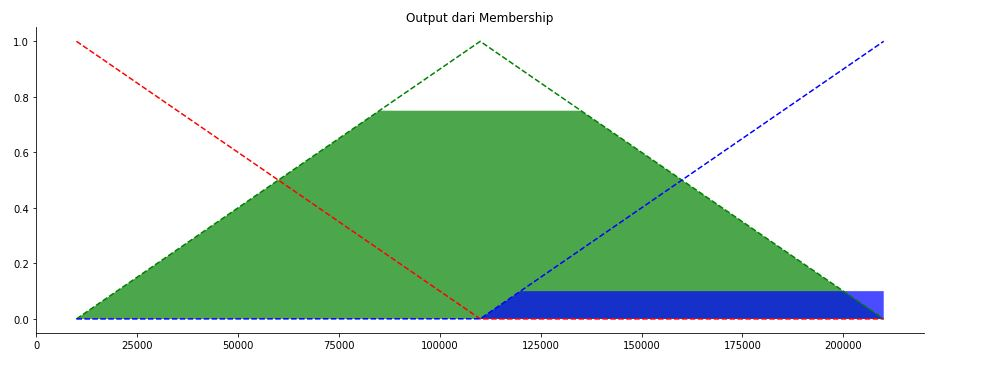

- Bonus Banyak
$$ Bonus [z] = 
\begin{cases}
    0 & ; z \leq 10000\\
    \frac{(z-10000)}{(110000-10000)} & ;10000 \leq z \leq\ 85000 \\
    0.75 & ;85000 \leq z \leq\ 135000 \\
    \frac{(210000-z)}{(210000-110000)} & ;135000 \leq z \leq\ 200000 \\
    0.1 & ;20000 \leq z \leq\ 210000 \\
\end{cases}
$$

#### b. Centroid

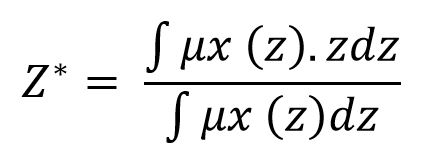

#### c. Perhitungan

Menghitung momen di tiap area (M)

- M1

$$
M1 = \frac{(z-10000)}{(100000}  
$$

$$
M1 = (0.00001z - 0.1)
$$

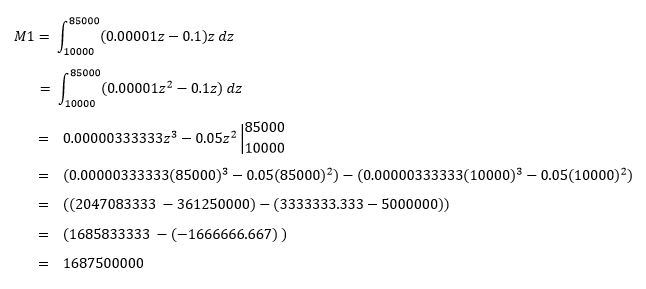

- M2

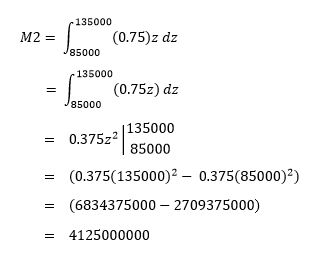

- M3

$$
M3 = \frac{(210000-z)}{(100000}  
$$

$$
M3 = (2.1-0.00001z) 
$$

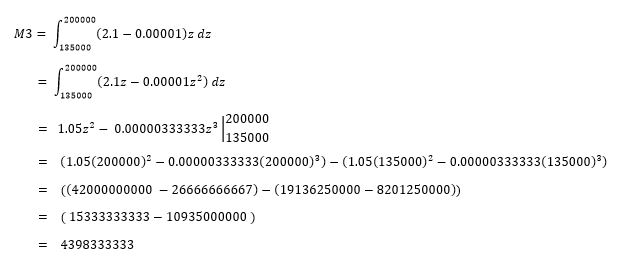

- M4

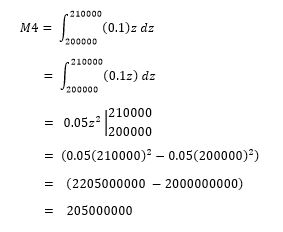

Menghitung luas area (A)

- A1

$$
A1 = \frac{(85000-10000) x 0.75}{2}  
$$

$$
A1 =  28125
$$

- A2

$$
A2 = (135000-10000) x 0.75  
$$

$$
A2 =  37500
$$

- A3

$$
A3 = \frac{(200000-135000) x (0.75-0.1)}{2}  
$$

$$
A3 =  21125
$$

- A4

$$
A4 = (210000-135000) x 0.1  
$$

$$
A3 =  7500
$$

- DEFUZZIFIKASI DENGAN CENTROID (Z*)

$$
Z^* = \frac{1687500000+4125000000+4398333333+205000000}{28125+37500+21125+7500}
$$

$$
Z^* =  \frac{10415833333}{94250}
$$

$$
Z^* =  110512.8205
$$

- ANALISA

a. Jumlah Bonus yang didapatkan dalam perhitungan python sebesar 110512.8205127567, sedangkan jumlah bonus yang didapatkan oleh perhitungan manual dengan menggunakan centroid sebesar 110512.820509.  
b. Selisih antara perhitungan manual dengan perhitungan oleh python sebesar 0.0000037567.  
c. Selisih tersebut disebabkan oleh pengubahan bilangan integral pecahan menjadi bilangan desimal pada saat penghitungan momen di tiap area.